In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
# Checking for details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
# Checking for null values
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
# Checking for descriptive statistics
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
pd.set_option("display.max_columns", 31)
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [ ]:
y_count = df.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})


,size_category,counts
0,small,378
1,large,139


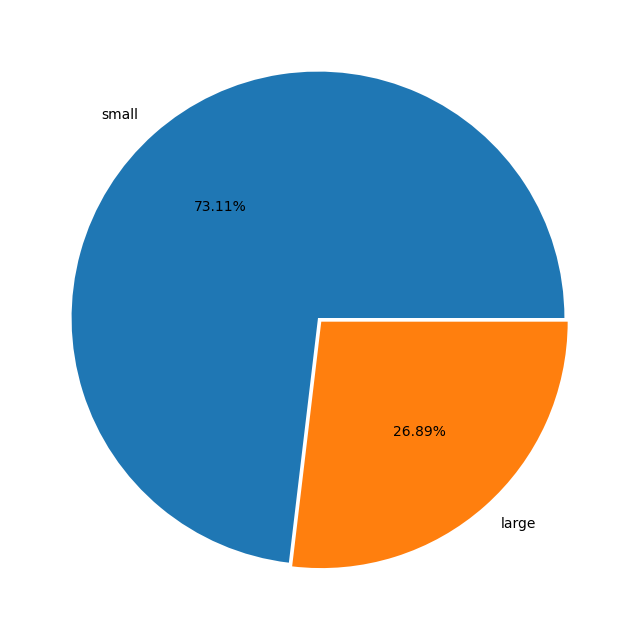

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(y_count.counts, labels=y_count['size_category'], autopct='%1.2f%%', explode=(0,0.02))
y_count

In [ ]:
month_df = df.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_df.head(10)

,size_category,month,count
11,small,aug,141
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42
15,small,jul,23
16,small,jun,14
13,small,feb,14
6,large,mar,12
20,small,oct,11


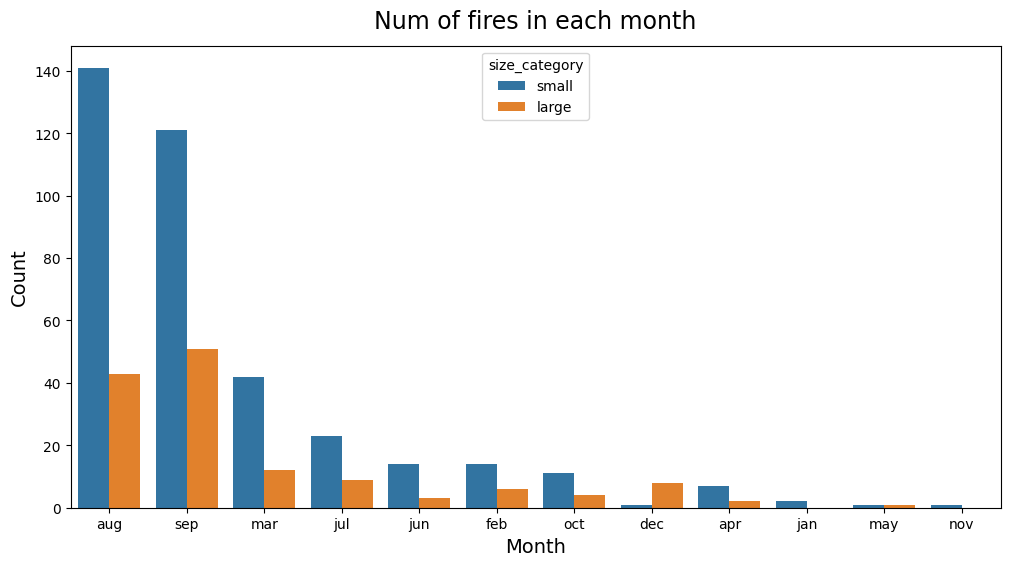

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='month', y = 'count', hue='size_category', data= month_df)
plt.title("Num of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [ ]:
day_df = df.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_df

,size_category,day,count
10,small,sun,68
7,small,fri,64
9,small,sat,58
8,small,mon,55
11,small,thu,48
12,small,tue,44
13,small,wed,41
3,large,sun,27
2,large,sat,26
0,large,fri,21


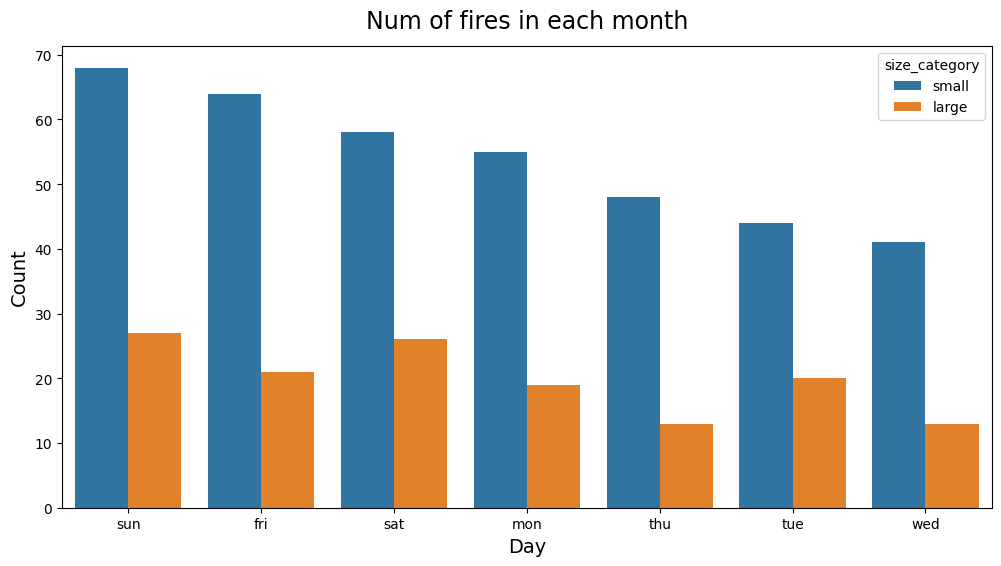

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='day', y = 'count', hue='size_category', data= day_df)
plt.title("Num of fires on each day", fontsize=17, y=1.02)
plt.title("Num of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Observation:
Aug month has seen highest number of small fires. Whereas sep month has seen highest num of large fires. Least num of fires occured in month of nov.

In [ ]:
X= df.iloc[:,0:30]
Y= df.iloc[:,30]

In [ ]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
X= X.apply(LabelEncoder().fit_transform)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=40)

In [ ]:
rain_df = df.groupby(['size_category', 'rain']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
rain_df

,size_category,rain,count
2,small,0.0,371
0,large,0.0,138
3,small,0.2,2
5,small,0.8,2
1,large,6.4,1
4,small,0.4,1
6,small,1.0,1
7,small,1.4,1


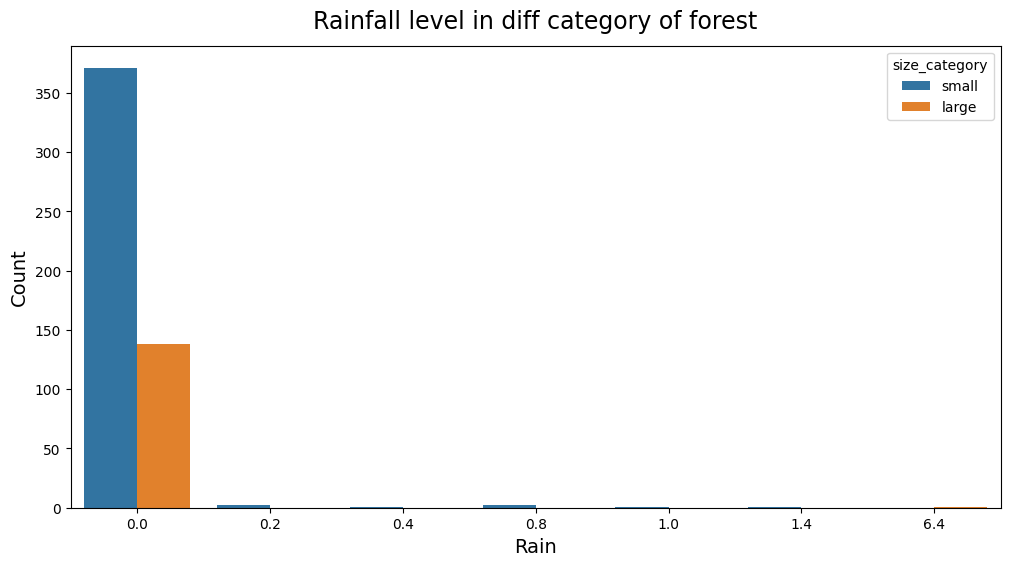

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='rain', y='count', hue='size_category', data= rain_df)
plt.title("Rainfall level in diff category of forest", y=1.02, fontsize=17)
plt.xlabel('Rain', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Observation:
0 represents large forest fire, 1 represents small forest fire. Majority of the forests have almost no rainfall. Highest rainfall a forest has was of 6.4 and it comes under a large forest fire catogory.

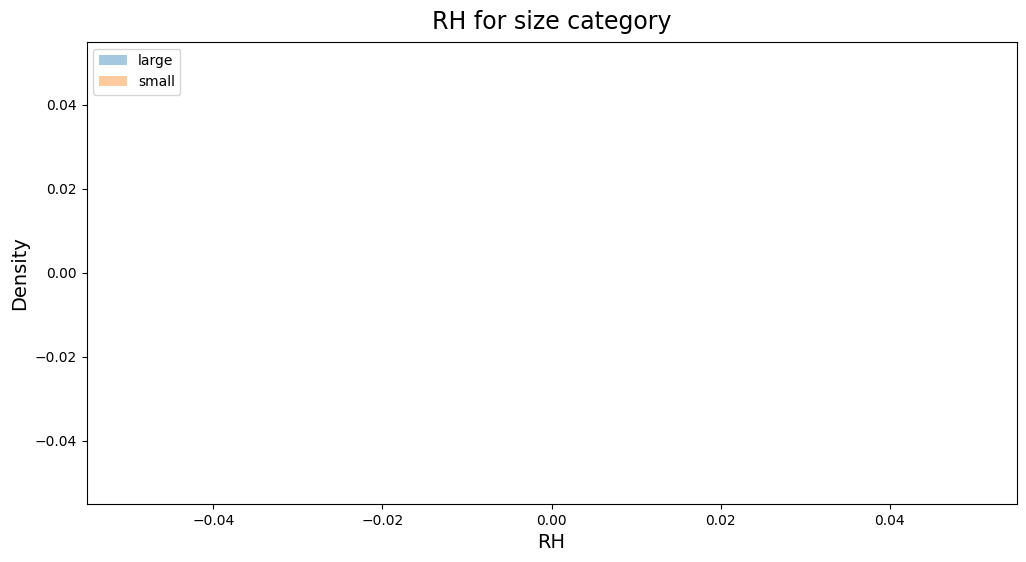

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['RH'])
sns.distplot(df[df['size_category']==1]['RH'])
plt.title("RH for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('RH', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

Observation
Fairly normal data. Will have to check for outliers with diff method.

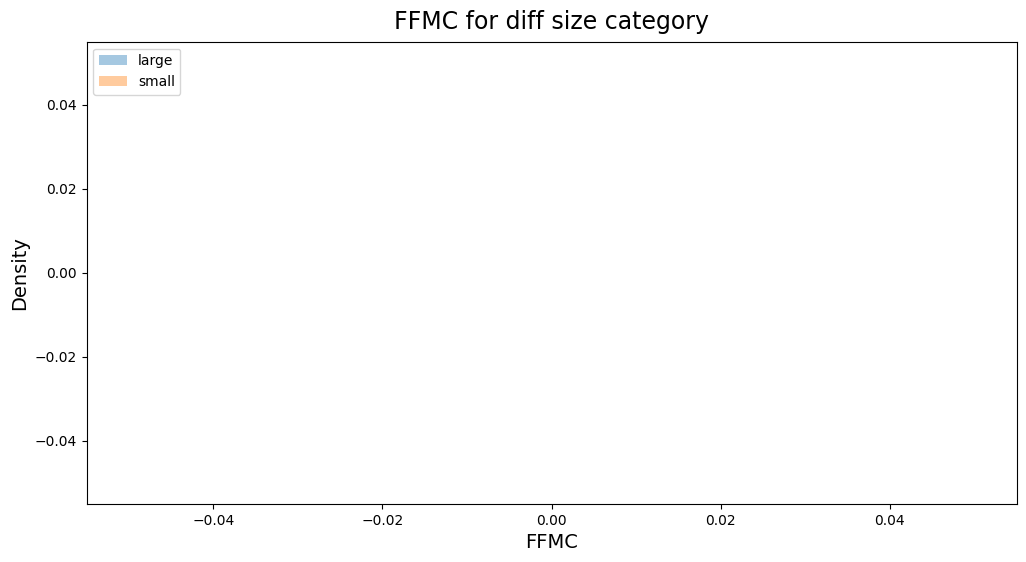

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['FFMC'])
sns.distplot(df[df['size_category']==1]['FFMC'])
plt.title("FFMC for diff size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('FFMC', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

Observation:
Highly skewed data. There are definitly outliers in this variable.

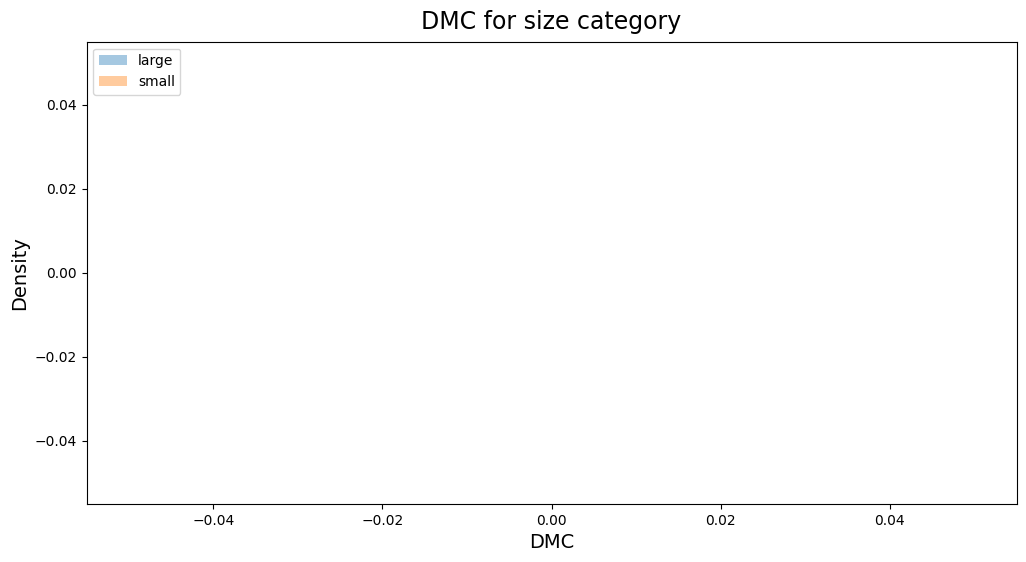

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['DMC'])
sns.distplot(df[df['size_category']==1]['DMC'])
plt.title("DMC for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('DMC', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()


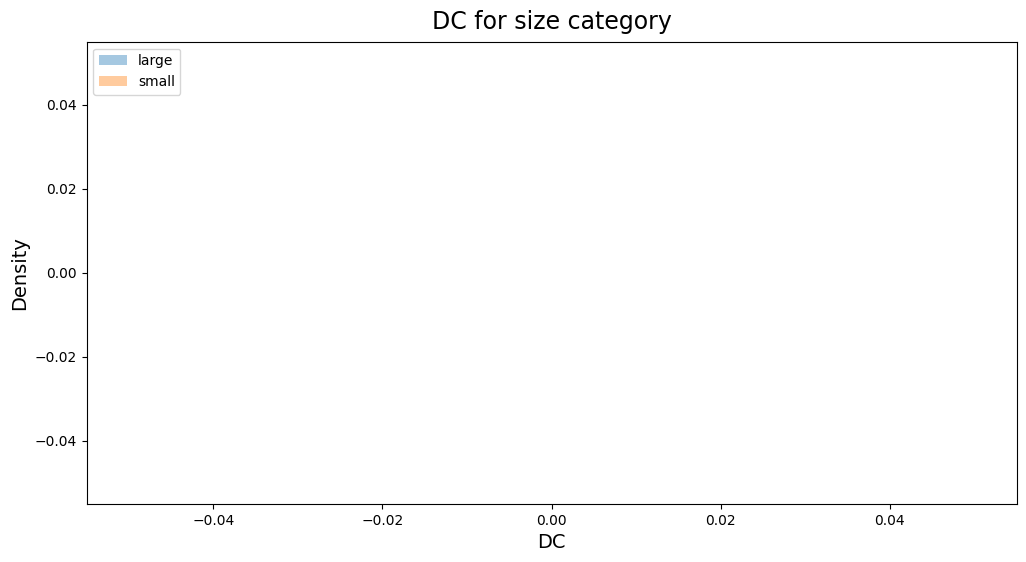

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['DC'])
sns.distplot(df[df['size_category']==1]['DC'])
plt.title("DC for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('DC', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

Observation:
Highly skewed data. Outliers are present.

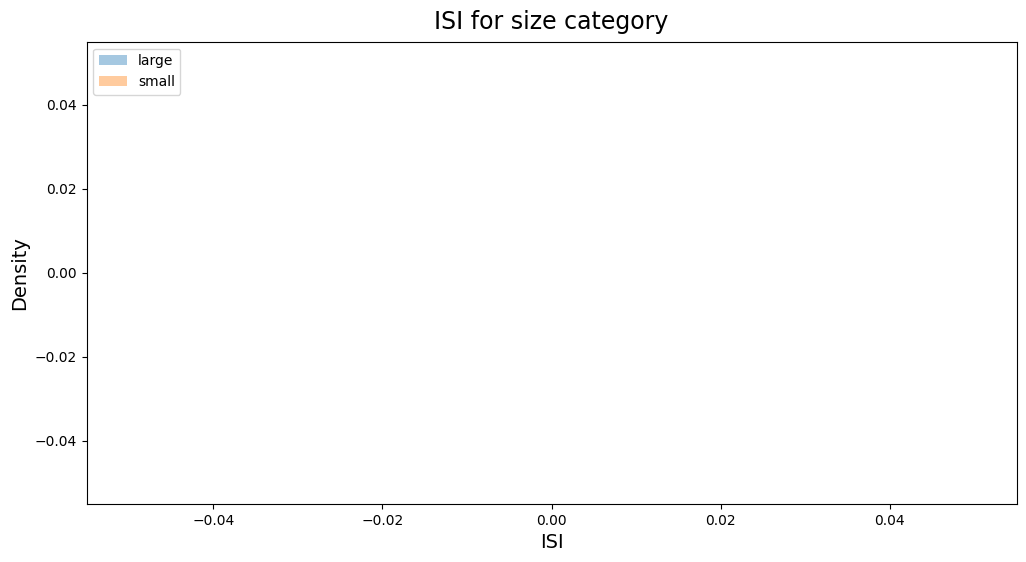

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['ISI'])
sns.distplot(df[df['size_category']==1]['ISI'])
plt.title("ISI for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('ISI', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

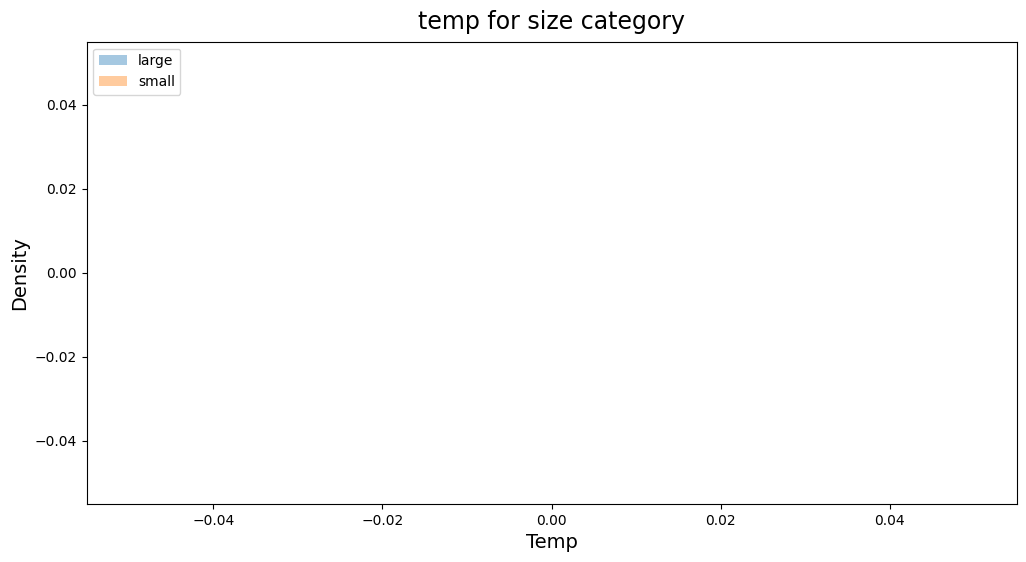

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['temp'])
sns.distplot(df[df['size_category']==1]['temp'])
plt.title("temp for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('Temp', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

Observation:
Fairly Normal distribution. Large forest fire has slighly higher temp than small forest fires.

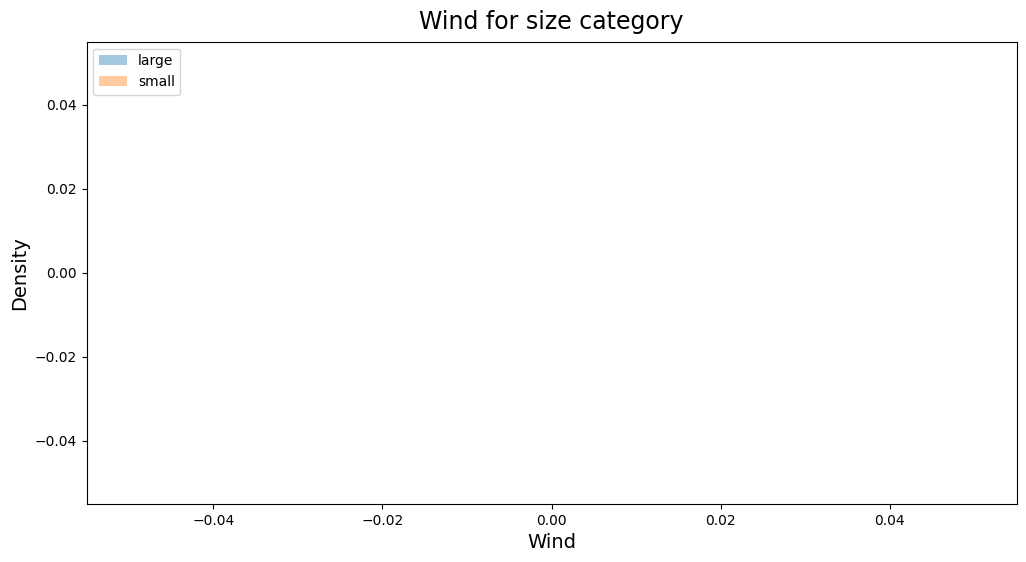

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['wind'])
sns.distplot(df[df['size_category']==1]['wind'])
plt.title("Wind for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('Wind', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

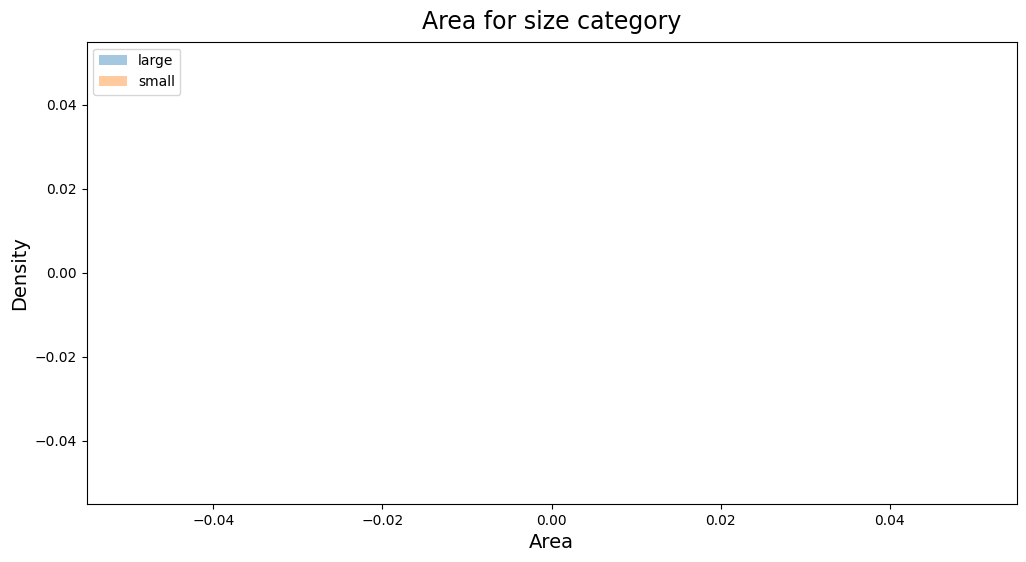

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['area'])
sns.distplot(df[df['size_category']==1]['area'])
plt.title("Area for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('Area', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

Observation:
Large the forest area, larger the fire. So we can see, area large area forest are coming under large forest fire category.

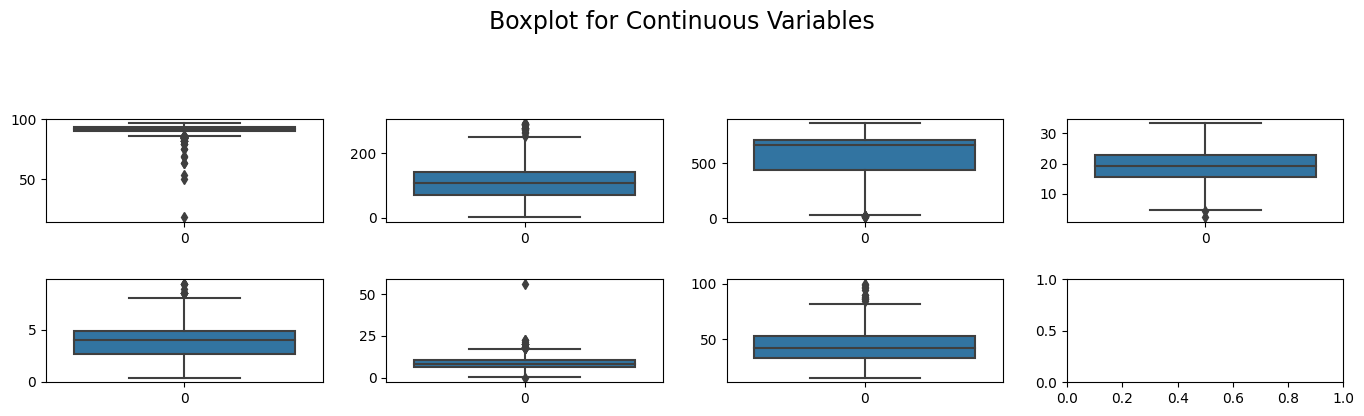

In [ ]:
fig, ax=plt.subplots(2,4, figsize=(14,4), sharex= False, sharey = False)
sns.boxplot(df.FFMC, ax=ax[0,0])
sns.boxplot(df.DMC, ax=ax[0,1])
sns.boxplot(df.DC, ax=ax[0,2])
sns.boxplot(df.temp, ax=ax[0,3])
sns.boxplot(df.wind, ax=ax[1,0])
sns.boxplot(df.ISI, ax=ax[1,1])
sns.boxplot(df.RH, ax=ax[1,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

Observation:
We do have a very noisy data.

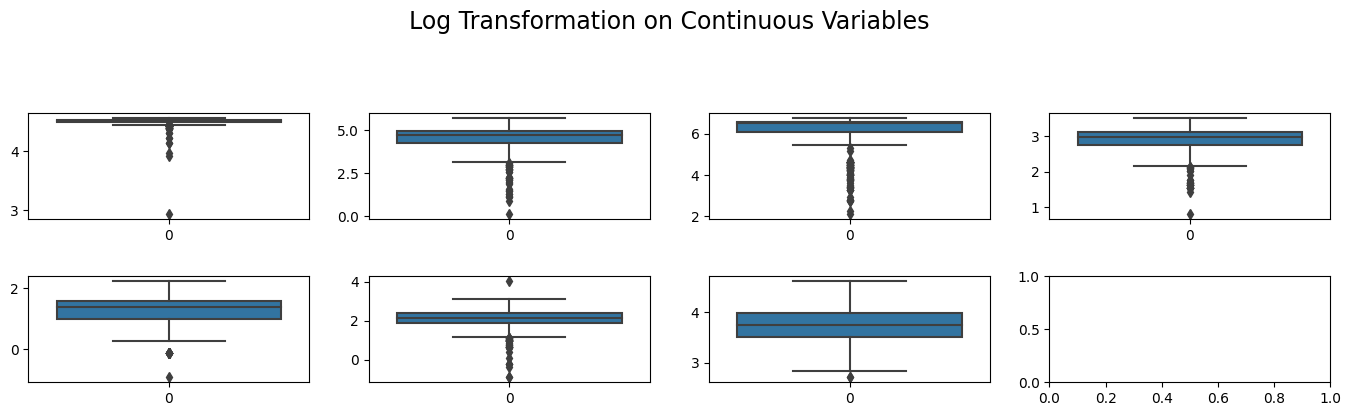

In [ ]:
# Let try to treat our outliers by log tranformations
fig, ax=plt.subplots(2,4, figsize=(14,4), sharex= False, sharey = False)
sns.boxplot(np.log(df.FFMC), ax=ax[0,0])
sns.boxplot(np.log(df.DMC), ax=ax[0,1])
sns.boxplot(np.log(df.DC), ax=ax[0,2])
sns.boxplot(np.log(df.temp), ax=ax[0,3])
sns.boxplot(np.log(df.wind), ax=ax[1,0])
sns.boxplot(np.log(df.ISI), ax=ax[1,1])
sns.boxplot(np.log(df.RH), ax=ax[1,2])
plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

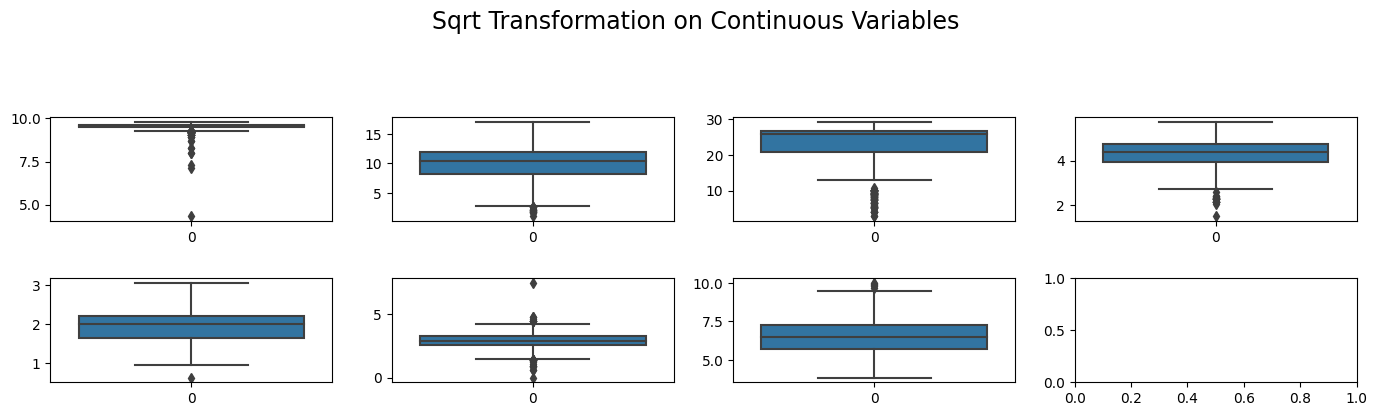

In [ ]:
# Let try to treat our outliers by sqrt tranformations
fig, ax=plt.subplots(2,4, figsize=(14,4), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.FFMC), ax=ax[0,0])
sns.boxplot(np.sqrt(df.DMC), ax=ax[0,1])
sns.boxplot(np.sqrt(df.DC), ax=ax[0,2])
sns.boxplot(np.sqrt(df.temp), ax=ax[0,3])
sns.boxplot(np.sqrt(df.wind), ax=ax[1,0])
sns.boxplot(np.sqrt(df.ISI), ax=ax[1,1])
sns.boxplot(np.sqrt(df.RH), ax=ax[1,2])
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

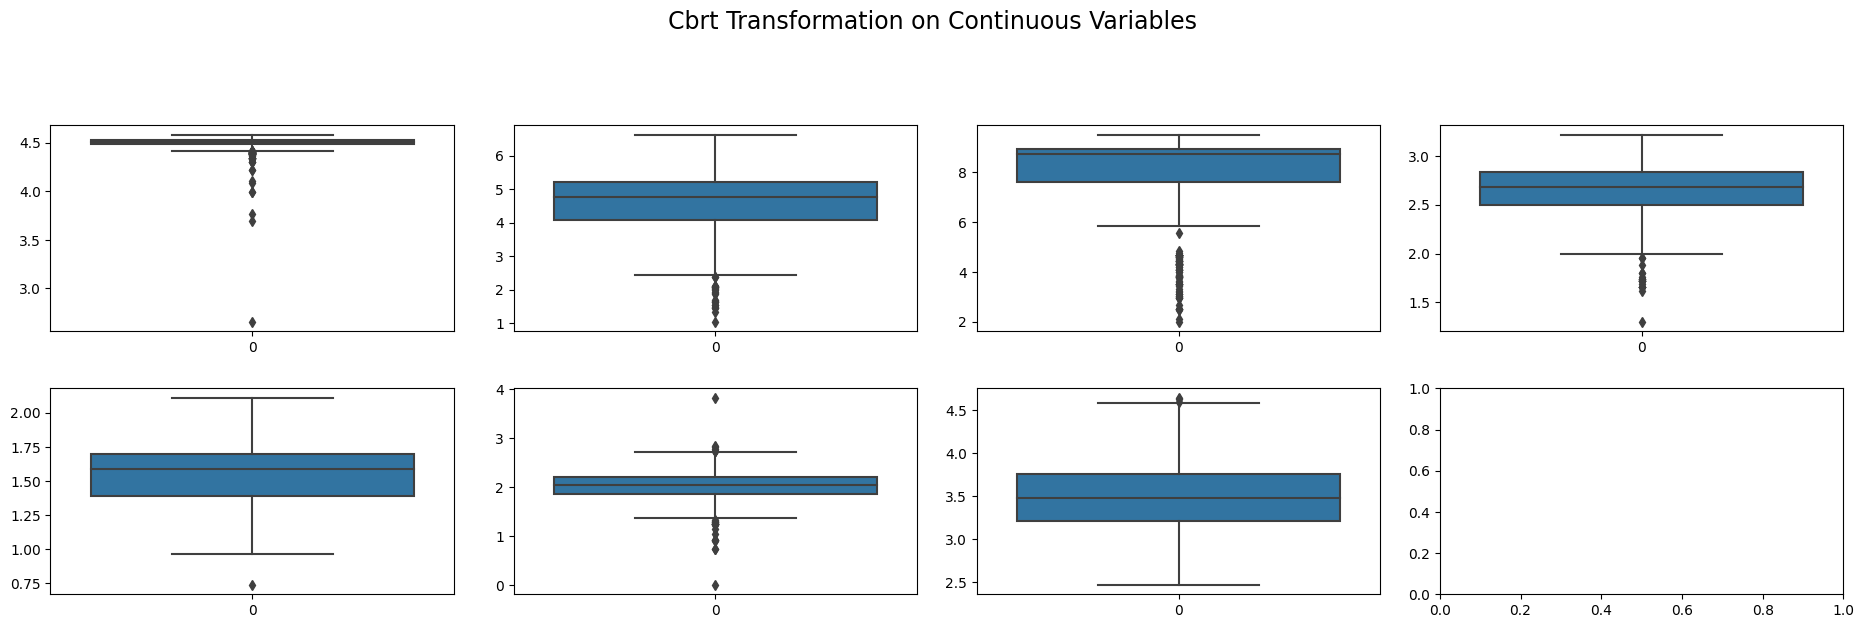

In [ ]:
# Let try to treat our outliers by cbrt tranformations
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.FFMC), ax=ax[0,0])
sns.boxplot(np.cbrt(df.DMC), ax=ax[0,1])
sns.boxplot(np.cbrt(df.DC), ax=ax[0,2])
sns.boxplot(np.cbrt(df.temp), ax=ax[0,3])
sns.boxplot(np.cbrt(df.wind), ax=ax[1,0])
sns.boxplot(np.cbrt(df.ISI), ax=ax[1,1])
sns.boxplot(np.cbrt(df.RH), ax=ax[1,2])
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

Observation:

None of the helpful to treat outliers in any of the features.


1. Linear SVM

In [ ]:
model_linear = SVC(kernel= "linear")
model_linear.fit(x_train,y_train)
preds_linear = model_linear.predict(x_test)
np.mean(preds_linear==y_test)

0.9871794871794872

2. Poly SVM

In [ ]:
model_poly = SVC(kernel="poly")
model_poly.fit(x_train,y_train)
preds_poly = model_poly.predict(x_test)
np.mean(preds_poly==y_test)

0.9935897435897436

3. RBF SVM

In [ ]:
model_rbf = SVC(kernel="rbf")
model_rbf.fit(x_train,y_train)
preds_rbf=model_rbf.predict(x_test)
np.mean(preds_rbf==y_test)

0.9871794871794872

Model Evaluation

In [ ]:
from sklearn.metrics import classification_report
model=SVC()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

       large       1.00      0.95      0.97        38
       small       0.98      1.00      0.99       118

    accuracy                           0.99       156
   macro avg       0.99      0.97      0.98       156
weighted avg       0.99      0.99      0.99       156



In [ ]:
np.mean(pred==y_test)

0.9871794871794872

Grid Search CV RBF

In [ ]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10],'C':[15,14,13,12] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12], 'gamma': [50, 5, 10],
                          'kernel': ['rbf']}])

In [ ]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.7202702702702704)

Grid Search CV Using Sigmoid

In [ ]:
clf3 = SVC()
param_grid = [{'kernel':['sigmoid'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['sigmoid']}])

In [ ]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'sigmoid'}, 0.7147147147147148)